In [154]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('abs_births_aus.csv', skiprows=1)

In [155]:
# drop first row and name first colum month
data = data.drop(axis=0, index=0)
data = data.rename(columns={'Unnamed: 0': 'month'})

# remove unnamed columns
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

# drop any null rows
data = data.dropna()

# convert month to datetime and years to numeric
# before that, we never to overwrite nov-dec with new figures and remove total columns
data = data[data['month'] != 'Total']

# now keep only the newer, later figures for nov-dec
data = data[::-1].drop_duplicates(subset=['month'], keep='first')[::-1].reset_index(drop=True)

# actually converting month to datetime is not straightforward
month_order = ['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December']
data['month'] = pd.Categorical(data['month'], categories=month_order, ordered=True)
data = data.set_index('month')

# convert years to numeric
for col in data.columns:
    data[col] = pd.to_numeric(data[col].astype(str).str.replace(',', ''), errors='coerce')

# reverse order of columns to have the most recent year first
data = data.iloc[:, ::-1]

# melt data
data = data.reset_index()
data_long = data.melt(id_vars='month', var_name='year', value_name='births')


In [157]:
data
#data.info()


,month,2020,2021,2022,2023
0,January,24343,24793,24104,22964
1,February,22530,24695,23284,20876
2,March,24411,27433,25883,23420
3,April,23309,25342,24137,22044
4,May,23882,25669,24526,23772
5,June,23190,24928,23533,22731
6,July,23855,24905,23278,23082
7,August,23102,24060,23285,22752
8,September,22636,23558,22459,21877
9,October,21876,23073,21029,21355


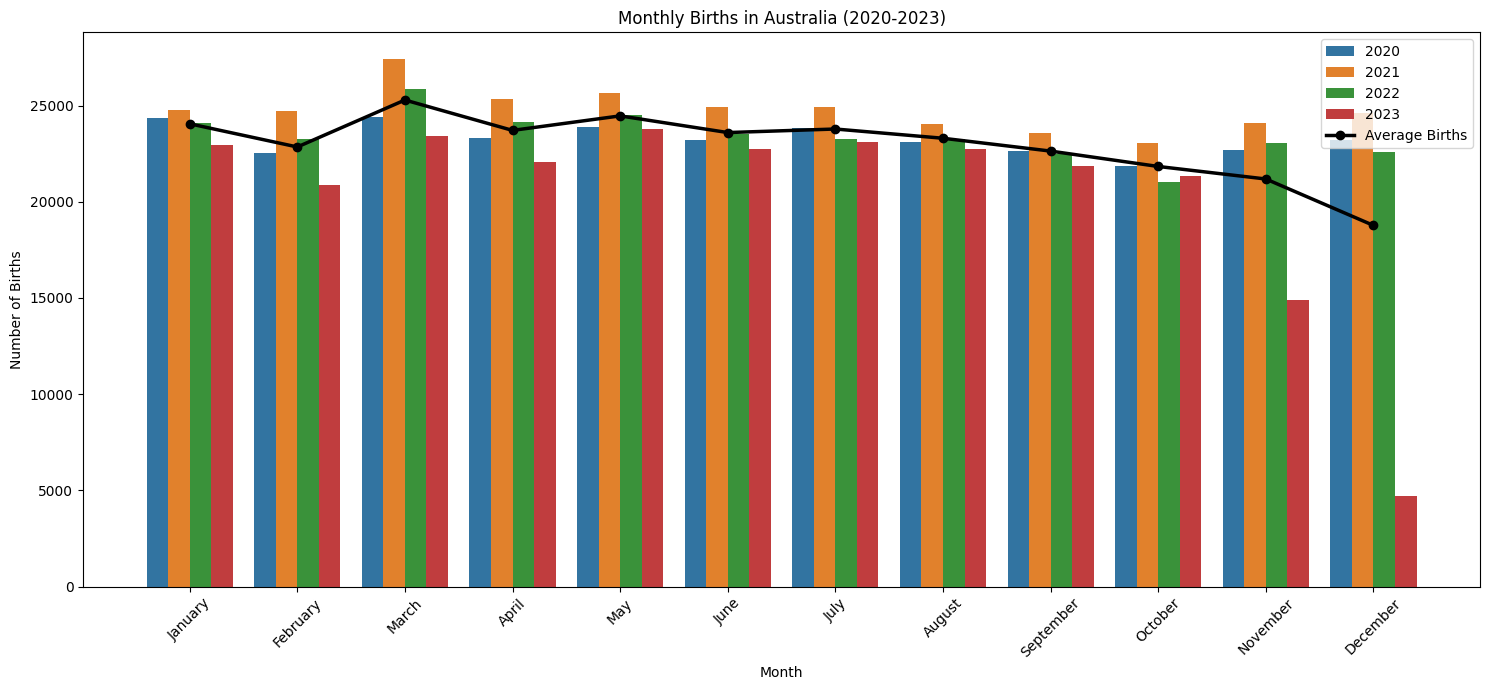

In [163]:
# visualise the data
plt.figure(figsize=(15, 7))

# Barplot: months on x, births by year (bars grouped by year)
sns.barplot(data=data_long, x='month', y='births', hue='year', palette='tab10')

# Compute and plot average births per month (line through bars)
avg = data_long.groupby('month', observed=False)['births'].mean()
plt.plot(avg.index, avg.values, color='black', marker='o', linewidth=2.5, label='Average Births')

plt.title('Monthly Births in Australia (2020-2023)')
plt.xlabel('Month')
plt.ylabel('Number of Births')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


## Monthly Birth Patterns: Seasonal Rhythms in Australian Demographics
The first visualization reveals compelling patterns in Australia's monthly birth rates:

Consistent seasonality appears across years, with notable peaks in October and relative lows in February
The timing suggests conception peaks during Australia's summer holiday season (December-January)
Year-to-year variation exists, but the overall monthly pattern remains remarkably stable
The black trend line highlights this persistent seasonal rhythm that transcends annual fluctuations
This pattern raises intriguing questions about social behavior, family planning decisions, and the cultural and environmental factors that might influence conception timing in Australian society.

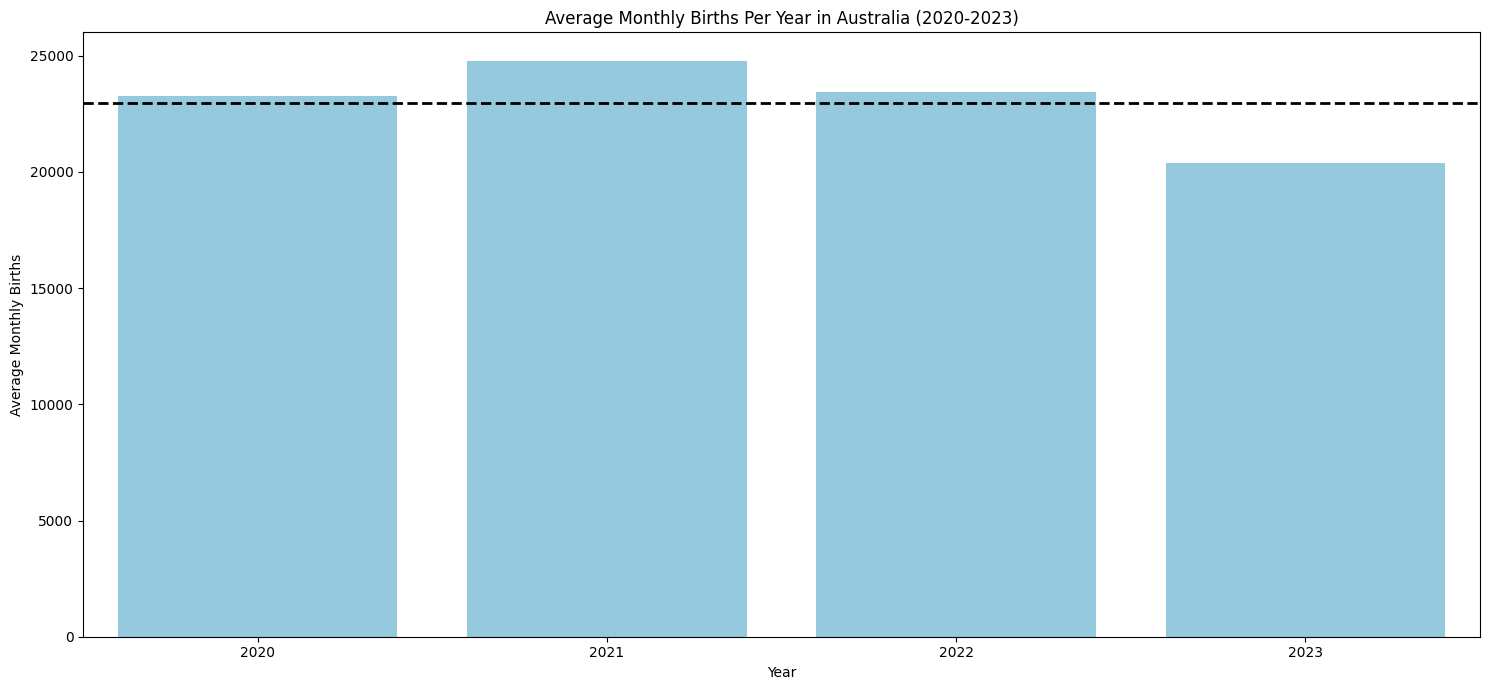

In [178]:
mean_births_per_year = data.drop('month', axis=1).mean(axis=0)
mean_births_per_year = mean_births_per_year.sort_index()  # Optional: sorts years in order

plt.figure(figsize=(15,7))

# Barplot for each year
sns.barplot(x=mean_births_per_year.index, y=mean_births_per_year.values, color='skyblue')

# Line for the overall average across all years
overall_avg = mean_births_per_year.mean()
plt.axhline(overall_avg, color='black', linestyle='--', linewidth=2, label='All Years Average')

plt.title('Average Monthly Births Per Year in Australia (2020-2023)')
plt.xlabel('Year')
plt.ylabel('Average Monthly Births')
plt.tight_layout()
plt.show()


## Birth Trends Across Years: Pandemic Effects?
The second visualization provides perspective on year-over-year changes:

2020 showed lower average monthly births compared to subsequent years
A notable increase occurred in 2021, potentially reflecting changing family decisions during the pandemic
The pattern suggests possible "catch-up" births following initial pandemic uncertainty
Despite fluctuations, the overall birth rate has remained within a relatively stable range
This yearly comparison offers valuable context for understanding demographic responses to major societal disruptions like COVID-19.



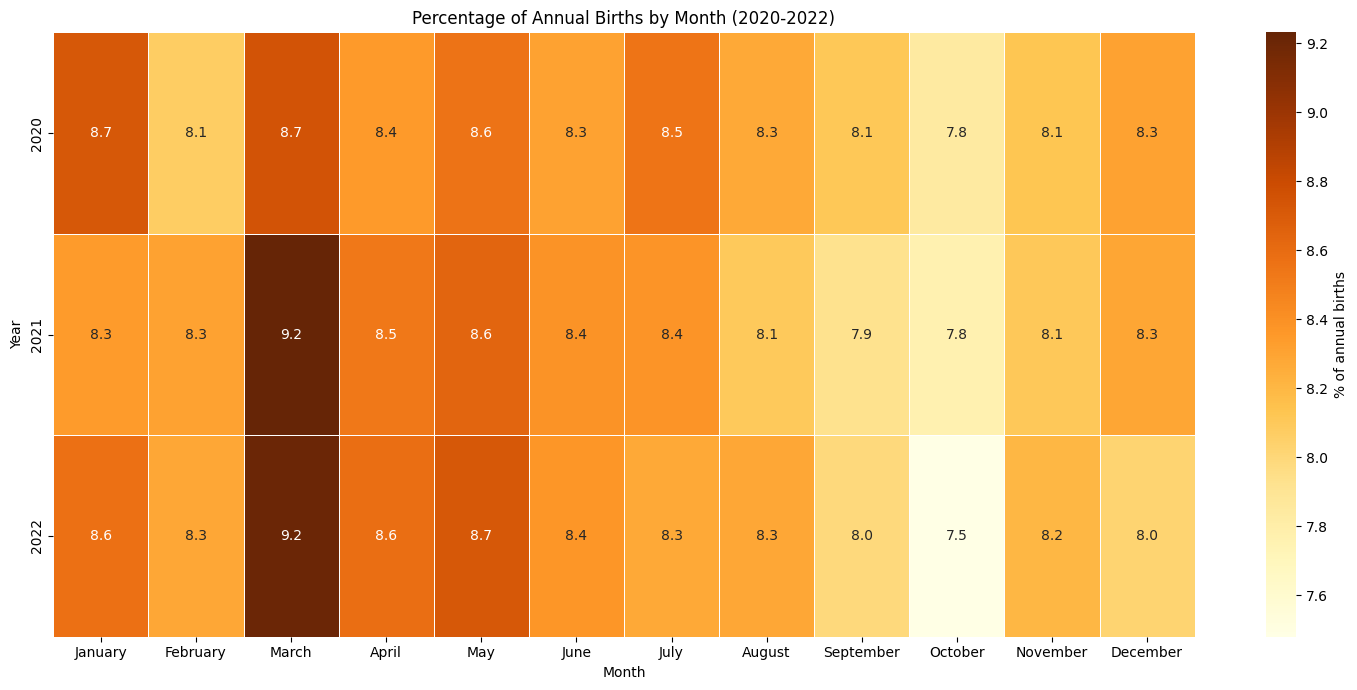

In [180]:
selected_years = ['2020', '2021', '2022']
data_subset = data[['month'] + selected_years].copy()

for col in selected_years:
    data_subset[col] = pd.to_numeric(data_subset[col], errors='coerce')

for col in selected_years:
    yearly_total = data_subset[col].sum()
    data_subset[col] = data_subset[col] / yearly_total * 100

plt.figure(figsize=(15, 7))
sns.heatmap(
    data_subset.set_index('month').T,  # months on y-axis, years on x-axis
    annot=True, fmt=".1f", cmap="YlOrBr", linewidths=.5,
    cbar_kws={'label': '% of annual births'}
)
plt.title("Percentage of Annual Births by Month (2020-2022)")
plt.ylabel("Year")
plt.xlabel("Month")
plt.tight_layout()
plt.show()


## Seasonal Distribution Heat Map: When Australians Are Born
Our heat map visualization provides a revealing look at birth seasonality:

The October-November period consistently captures the highest percentage of annual births (8-9%)
February-April consistently shows the lowest proportion of births (7-8%)
This pattern has remained remarkably consistent despite the pandemic disruption
The percentages reveal that birth distribution is more evenly spread throughout the year than might be expected
This visualization effectively highlights that while Australia does experience seasonal birth patterns, the variation between peak and trough months represents only about 1-2 percentage points of the annual total—suggesting biological and social factors create modest but persistent seasonal effects on birth timing.

## Key Findings and Implications of Australian Birth Patterns
Our analysis reveals distinct patterns in Australian births:

Seasonal cycles persist with October births (January conceptions) consistently highest
Minimal pandemic disruption to seasonal patterns despite changes in overall numbers
Even distribution throughout the year (peak-to-trough variation only 1-2%)
What's Missing
Several important aspects remain unexplored:

Demographic breakdown by age, socioeconomic status, or region
Historical context beyond recent years
Policy correlation with family benefits or parental leave
The persistence of these patterns even during COVID-19 suggests underlying biological or social factors that warrant further exploration for demographic planning.